In [2]:
from c19analysis import *
import cpnCommonlib as cpn
cpn.setup_figures(plt)

In [6]:
today = pd.to_datetime('07/07/2020')
path = '../'
filename = 'us-counties.csv'
fnamesta = 'us-states.csv'
data=pd.read_csv(path+filename,error_bad_lines=False)
data_st=pd.read_csv(path+fnamesta,error_bad_lines=False)
OH_sur = {'Lorain':39093,'Medina':39103,'Summit':39153,'Portage':39133,'Geauga':39055,'Lake':39085}
our_sur ={'Harford':24025,'Baltimore city':24510,	'Carroll':24013,'Howard':24027,'Anne Arundel':24003,'York':42133,'Montgomery':24031} #York in PA
    

## Summit

/home/cpnhere/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


2020-07-07_containment_test_Summit_daily.png SAVED.


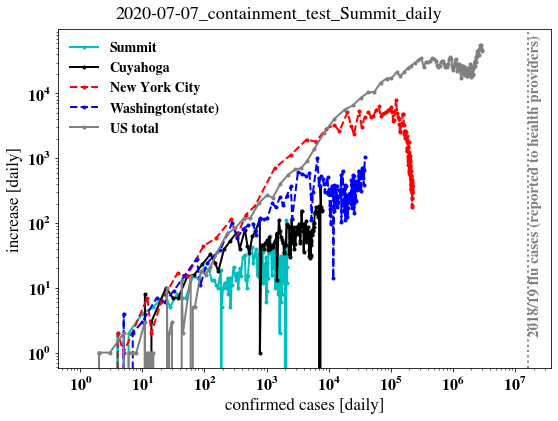

In [19]:
#Containment (Summit)
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Summit_daily'
confirmed_cases_vs_increase(data,'Summit',39153,fig3,ax3,clr='c',lns='.-')
confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='.-')
confirmed_cases_vs_increase(data,'New York City',np.nan,fig3,ax3,clr='r',lns='.--')
confirmed_cases_vs_increase_state(data_st,'Washington',fig3,ax3,clr='b',lns='.--')
confirmed_cases_vs_increase_US(data_st,ax3)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [daily]')
ax3.set_ylabel('increase [daily]')
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
fig3.show()
savefig(fig3,fig3_ttl)

/home/cpnhere/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


2020-07-07_containment_test_Summit_7day.png SAVED.


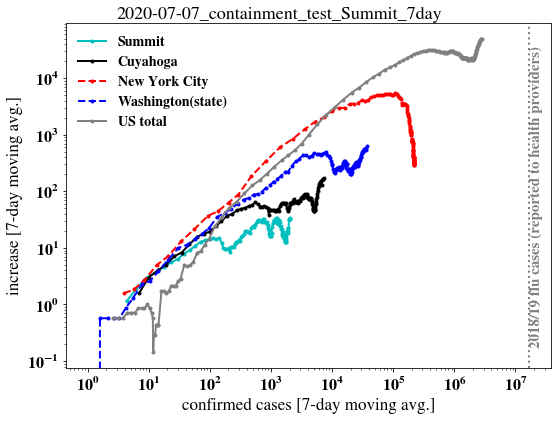

In [20]:
#Containment (Summit)
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Summit_7day'
confirmed_cases_vs_increase(data,'Summit',39153,fig3,ax3,clr='c',lns='.-',moving_window=7)
confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='.-',moving_window=7)
confirmed_cases_vs_increase(data,'New York City',np.nan,fig3,ax3,clr='r',lns='.--',moving_window=7)
confirmed_cases_vs_increase_state(data_st,'Washington',fig3,ax3,clr='b',lns='.--',moving_window=7)
confirmed_cases_vs_increase_US(data_st,ax3,moving_window=7)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,0.2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [7-day moving avg.]')
ax3.set_ylabel('increase [7-day moving avg.]')
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
fig3.show()
savefig(fig3,fig3_ttl)

## Baltimore

/home/cpnhere/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


2020-07-07_containment_test_Baltimore_daily.png SAVED.


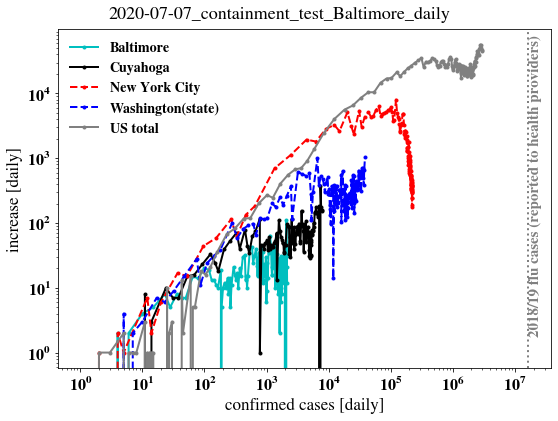

In [21]:
#Containment (Baltimore)
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Baltimore_daily'
confirmed_cases_vs_increase(data,'Baltimore',39153,fig3,ax3,clr='c',lns='.-')
confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='.-')
confirmed_cases_vs_increase(data,'New York City',np.nan,fig3,ax3,clr='r',lns='.--')
confirmed_cases_vs_increase_state(data_st,'Washington',fig3,ax3,clr='b',lns='.--')
confirmed_cases_vs_increase_US(data_st,ax3)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [daily]')
ax3.set_ylabel('increase [daily]')
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
fig3.show()
savefig(fig3,fig3_ttl)

/home/cpnhere/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


Replace existing file?:  y


2020-07-07_containment_test_Baltimore_7day.png SAVED.


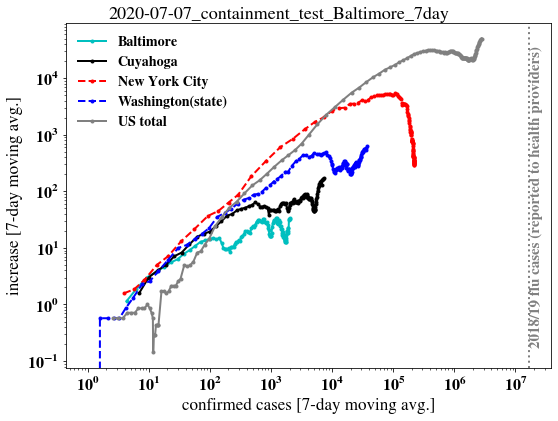

In [22]:
#Containment (Baltimore)
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Baltimore_7day'
confirmed_cases_vs_increase(data,'Baltimore',39153,fig3,ax3,clr='c',lns='.-',moving_window=7)
confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='.-',moving_window=7)
confirmed_cases_vs_increase(data,'New York City',np.nan,fig3,ax3,clr='r',lns='.--',moving_window=7)
confirmed_cases_vs_increase_state(data_st,'Washington',fig3,ax3,clr='b',lns='.--',moving_window=7)
confirmed_cases_vs_increase_US(data_st,ax3,moving_window=7)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,0.2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [7-day moving avg.]')
ax3.set_ylabel('increase [7-day moving avg.]')
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
fig3.show()
savefig(fig3,fig3_ttl)